# <h1>PREDICTING WINE QUALITY</h1>

# <h5>The two datasets are related to red and white variants of the Portuguese "Vinho Verde" wine. Only physicochemical (inputs) and sensory (the output) variables are available (e.g. there is no data about grape types, wine brand, wine selling price, etc.).<br><br> These datasets can be viewed as classification or regression tasks. The classes are ordered and not balanced (e.g. there are much more normal wines than excellent or poor ones). Outlier detection algorithms could be used to detect the few excellent or poor wines. Also, we are not sure if all input variables are relevant.<br><br>Our goal in the project is to perform a data analysis on the dataset and figure out the features for the model that predicts the wine quality index(score from 0-9)<br><br>You can use either regression or classification for the model prediction.</h5>



# <h2>DATASET DESCRIPTION</h2>

# <h3>The dataset contains 6498 rows and 14 columns</h3>
Input variables (based on physicochemical tests): 
<li>1 - fixed acidity 
<li>2 - volatile acidity 
<li>3 - citric acid 
<li>4 - residual sugar 
<li>5 - chlorides 
<li>6 - free sulfur dioxide 
<li>7 - total sulfur dioxide 
<li>8 - density 
<li>9 - pH 
<li>10 - sulphates 
<li>11 - alcohol 
Output variable (based on sensory data): 
<li>12 - quality (score between 0 and 10)
<li>13- good(1/0)
<li>14-Color(red/white)

In [5]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn
import sklearn.metrics
from sklearn import ensemble
from sklearn import linear_model
%matplotlib inline

# <h3> Loading data</h3>

In [24]:
df = pd.read_csv('C:\\Users\computer world\Desktop\ML\project wine quality\winequality.csv')

In [7]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,good,color
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0,red
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,0,red
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,0,red
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,0,red
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0,red


# <h2>Exploring the Wine Quality dataset </h2>

In [8]:
df.shape


(6497, 14)

In [9]:
df.columns.values


array(['fixed acidity', 'volatile acidity', 'citric acid',
       'residual sugar', 'chlorides', 'free sulfur dioxide',
       'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol',
       'quality', 'good', 'color'], dtype=object)

In [10]:
df.describe()


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,good
count,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000
mean,7.215307,0.339666,0.318633,5.443235,0.056034,30.525319,115.744574,0.994697,3.218501,0.531268,10.491801,5.818378,0.196552
std,1.296434,0.164636,0.145318,4.757804,0.035034,17.749400,56.521855,0.002999,0.160787,0.148806,1.192712,0.873255,0.397421
min,3.800000,0.080000,0.000000,0.600000,0.009000,1.000000,6.000000,0.987110,2.720000,0.220000,8.000000,3.000000,0.000000
25%,6.400000,0.230000,0.250000,1.800000,0.038000,17.000000,77.000000,0.992340,3.110000,0.430000,9.500000,5.000000,0.000000
50%,7.000000,0.290000,0.310000,3.000000,0.047000,29.000000,118.000000,0.994890,3.210000,0.510000,10.300000,6.000000,0.000000
75%,7.700000,0.400000,0.390000,8.100000,0.065000,41.000000,156.000000,0.996990,3.320000,0.600000,11.300000,6.000000,0.000000
max,15.900000,1.580000,1.660000,65.800000,0.611000,289.000000,440.000000,1.038980,4.010000,2.000000,14.900000,9.000000,1.000000


# <h1> To Check Missing Values</h1>

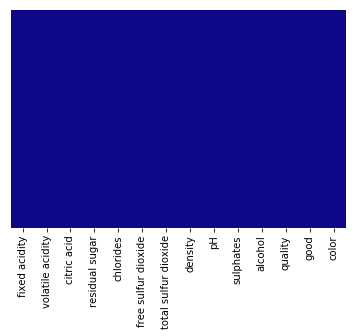

In [11]:
sns.heatmap(df.isnull(),cbar=False,yticklabels=False,cmap = 'plasma')

# <h3> NO missing values in dataset</h3>

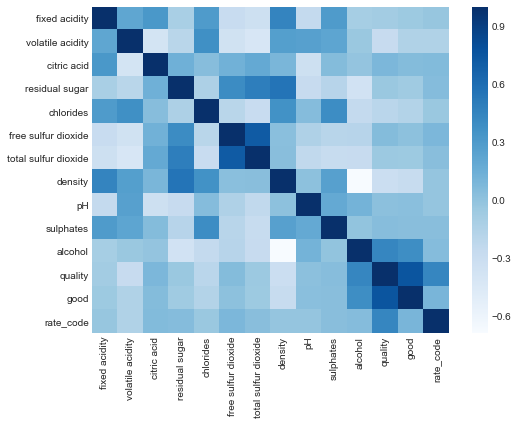

In [104]:
plt.figure(figsize=(8,6))
sns.heatmap(df.corr(),cmap='Blues',annot=False)

# <h5>Dark shades represents positive correlation while lighter shades represents negative correlation<br><br>If you set annot=True, you'll get values by which features are correlated to each other in grid-cells</h5>

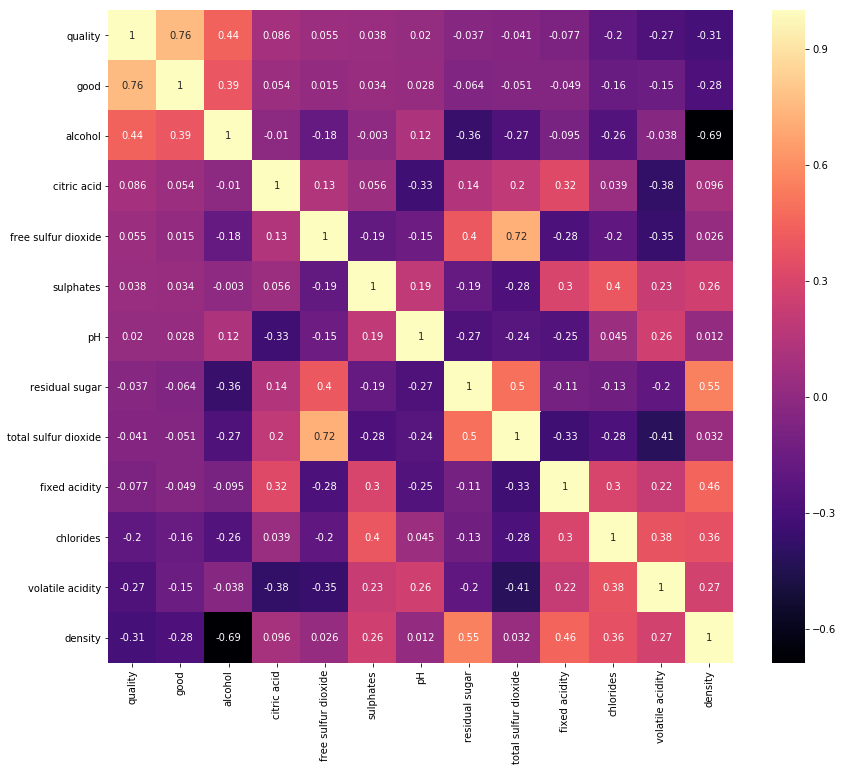

In [12]:
k = 14 
cols = df.corr().nlargest(k, 'quality')['quality'].index
cm = df[cols].corr()
plt.figure(figsize=(14,12))
sns.heatmap(cm, annot=True, cmap = 'magma')

# <h5>Here we can infer that "density" has strong positive correlation with "residual sugar" whereas it has strong negative correlation with "alcohol".<br><br>"free sulphur dioxide" and "citric acid" has almost no correlation with "quality"<br><br>Since correlation is zero we can infer there is no linear relationship between these two predictors.However it is safe to drop these features in case you're applying Linear Regression model to the dataset.</h5>

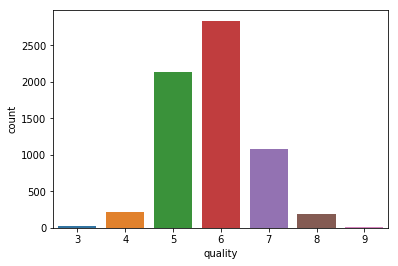

In [13]:
sns.countplot(x='quality', data=df)

# <h5>The above distribution shows the range for response variable (quality) is between 3 to 8.<br><br>Let's create a new discreet, categorical response variable/feature ('rating') from existing 'quality' variable.<br><br>i.e. bad: 1-4<br>average: 5-6<br>good: 7-10

# <h1>Analysis of alcohol percentage with wine quality:</h1>

[Text(0,0.5,'Alcohol Percent'),
 Text(0.5,0,'Wine Quality'),
 Text(0.5,1,'Alcohol percent in different wine quality types')]

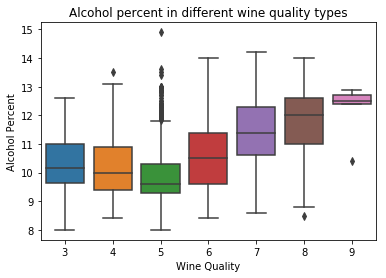

In [14]:
bx = sns.boxplot(x="quality", y='alcohol', data = df)
bx.set(xlabel='Wine Quality', ylabel='Alcohol Percent', title='Alcohol percent in different wine quality types')

# <h3>Analysis of fixed acidity and rating</h3>

[Text(0,0.5,'fixed acidity'),
 Text(0.5,0,'good'),
 Text(0.5,1,'Fixed Acidity in different types of Wine ratings')]

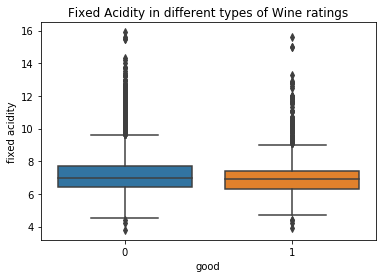

In [15]:
bx = sns.boxplot(x="good", y='fixed acidity', data = df)
bx.set(xlabel='good', ylabel='fixed acidity', title='Fixed Acidity in different types of Wine ratings')

# <h1> LINEAR REGRESSION</h1>

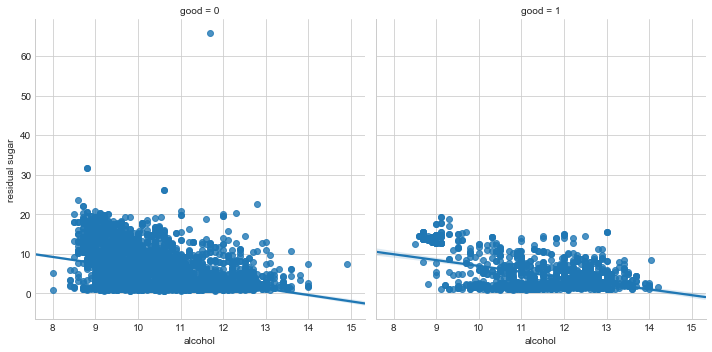

In [108]:
sns.lmplot(x = "alcohol", y = "residual sugar", col = "good", data = df)

# <h5><ul type='disc'>The linear regression plots above for different wine quality(0,1) shows the regression between alcohol and residual sugar content of the wine.<br><br>We can observe from the trendline that, for good and average wine types the residual sugar content remains almost constant irrespective of alcohol content value. Whereas for bad quality wine, the residual sugar content increases gradually with the increase in alcohol content.<br><br>This analysis can help in manufacturing the good quality wine with continuous monitoring and contrilling the alcohol and residual sugar content of the wine.</ul></h5>

In [25]:
y,X = dmatrices('quality ~ alcohol', data=df, return_type='dataframe')
print("X:", type(X))
print(X.columns)
model=smf.OLS(y, X)
result=model.fit()
result.summary()

X: <class 'pandas.core.frame.DataFrame'>
Index(['Intercept', 'alcohol'], dtype='object')


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                quality   R-squared:                       0.197
Model:                            OLS   Adj. R-squared:                  0.197
Method:                 Least Squares   F-statistic:                     1598.
Date:                Fri, 19 Apr 2019   Prob (F-statistic):          1.50e-312
Time:                        22:32:47   Log-Likelihood:                -7623.4
No. Observations:                6497   AIC:                         1.525e+04
Df Residuals:                    6495   BIC:                         1.526e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.4053      0.086     27.988      0.000       2.237       2.574
alcohol        0.3253      0.008     39.970      0.000       0.309       0.341
==============================================================================
Omnibus:                      123.922   Durbin-Watson:                   1.636
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              258.800
Skew:                           0.031   Prob(JB):                     6.34e-57
Kurtosis:                       3.976   Cond. No.                         94.3
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [26]:
model = smf.OLS.from_formula('quality ~ alcohol', data = df)
results = model.fit()
print(results.params)

Intercept    2.405269
alcohol      0.325312
dtype: float64


# <h6>The above wine quality vs alcohol content regression model's result shows that, the minimum value for quality is 1.87 and there will be increment by single unit for wine quality for every change of 0.360842 alcohol units.</h6> 

In [27]:
df2=df[['quality','good','alcohol']]

In [28]:
df2.head()


,quality,good,alcohol
0,5,0,9.4
1,5,0,9.8
2,5,0,9.8
3,6,0,9.8
4,5,0,9.4


In [30]:
X=df2[['good','alcohol']]
y=df2['quality']

In [31]:
from sklearn.feature_selection import VarianceThreshold
z=VarianceThreshold(0.5).fit_transform(X)

In [32]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, \
                                                    random_state=0)

In [33]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

# <h3>Making predictions</h3>

In [34]:
y_pred = regressor.predict(X_test)

In [35]:
dfp = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
dfp

,Actual,Predicted
5316,6,5.356866
5210,6,5.613196
3518,6,5.331233
1622,5,5.369682
2443,8,7.103040
3521,5,5.382499
5211,6,5.561930
4936,6,5.395315
1161,6,5.485031
5993,6,5.561930


In [36]:
from sklearn import metrics

print('Mean Absolute Error: ', metrics.mean_absolute_error(y_test, y_pred))

print('Mean Squared Error: ', metrics.mean_squared_error(y_test, y_pred))

print('Root Mean Squared Error: ', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error:  0.467039922165919
Mean Squared Error:  0.31211026544193665
Root Mean Squared Error:  0.5586682964353147


In [37]:
print(metrics.r2_score(y_test, y_pred))

0.5975217511195623


# <h1>CLASSIFICATION</h1>

# <h5>Classification using Statsmodel:</h5>

 <li>We will use statsmodel for this logistic regression analysis of predicting good wine quality (>4).</li>
 <br>
 <li>Let's create a new categorical variable/column (rate_code) with two possible values (good = 1 & bad = 0).</li>

In [17]:
df['rate_code'] = (df['quality'] > 4).astype(np.float32)

C:\Users\computer world\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
C:\Users\computer world\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


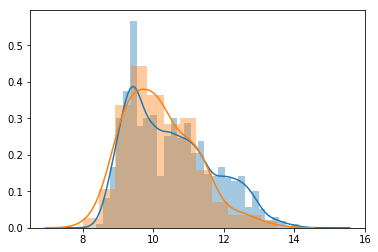

In [18]:
y, X = dmatrices('rate_code ~ alcohol', data = df)
sns.distplot(X[y[:,0] > 0, 1])
sns.distplot(X[y[:,0] == 0, 1])

# <h5>The above plot shows the higher probability for wine quality will be good if alcohol percentage is more than equal to 12, whereas the same probability reduces as alcohol percentage decreases.</h5>

In [19]:
model = smf.Logit(y, X)
result = model.fit()
result.summary2()

Optimization terminated successfully.
         Current function value: 0.159712
         Iterations 8


<class 'statsmodels.iolib.summary2.Summary'>
"""
                         Results: Logit
=================================================================
Model:              Logit            Pseudo R-squared: 0.009     
Dependent Variable: rate_code        AIC:              2079.3039 
Date:               2019-04-19 22:24 BIC:              2092.8621 
No. Observations:   6497             Log-Likelihood:   -1037.7   
Df Model:           1                LL-Null:          -1046.6   
Df Residuals:       6495             LLR p-value:      2.2633e-05
Converged:          1.0000           Scale:            1.0000    
No. Iterations:     8.0000                                       
-------------------------------------------------------------------
             Coef.    Std.Err.     z      P>|z|     [0.025   0.975]
-------------------------------------------------------------------
Intercept    0.7020     0.6135   1.1442   0.2526   -0.5005   1.9045
alcohol      0.2450     0.0598   4.0943   0.0000    0.1277   0.3623
=================================================================

"""

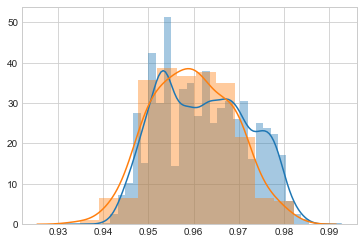

In [112]:
yhat = result.predict(X)
sns.distplot(yhat[y[:,0] > 0])
sns.distplot(yhat[y[:,0] == 0])

In [21]:
yhat = result.predict(X) > 0.955
print(sklearn.metrics.classification_report(y, yhat))

             precision    recall  f1-score   support

        0.0       0.04      0.35      0.07       246
        1.0       0.96      0.68      0.80      6251

avg / total       0.93      0.67      0.77      6497



 <li>The above distribution plot displays the overlapped outcomes for the good and bad quality plots of the wine.</li>
<br>
<li>We can observe that the precision for the good wine prediction is almost 96% accurate, where as for bad wine its only 4%, which is not good. But overall there is 93% average precision in wine quality rate prediction.</li>

# <h2><b>Classification using Sklearn's LogisticRegression:</b></h2>

In [22]:
model = sklearn.linear_model.LogisticRegression()
y,X = dmatrices('rate_code ~ alcohol + sulphates + density + pH', data = df)
model.fit(X, y)
yhat = model.predict(X)
print(sklearn.metrics.classification_report(y, yhat))

             precision    recall  f1-score   support

        0.0       0.00      0.00      0.00       246
        1.0       0.96      1.00      0.98      6251

avg / total       0.93      0.96      0.94      6497



C:\Users\computer world\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\computer world\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


<li>The accuracy matrix for sklearn's linear regression model for wine quality prediction shows the overall 93% precision which is similar to previous statsmodel's average precision.</li>
<br>
<li>Also the precision for good wine (1) prediction is almost 96%.</li>
<br>
<li>But the precision is almost 0% for the bad type of wine (0) with sklearn's linear regression model. Which is not a good sign for the analysis.</li>

# <h4>Classification using Sklearn's RandomForestClassifier:</h4>

In [23]:
y, X = dmatrices('rate_code ~ alcohol', data = df)
model = sklearn.ensemble.RandomForestClassifier()
model.fit(X, y)
yhat = model.predict(X)
print(sklearn.metrics.classification_report(y, yhat))

C:\Users\computer world\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


             precision    recall  f1-score   support

        0.0       1.00      0.01      0.02       246
        1.0       0.96      1.00      0.98      6251

avg / total       0.96      0.96      0.94      6497




<li>Here, with the accuracy matrix for sklearn's random forest classifier model for the prediction of wine quality, we can observe that the values have been improved significantly.</li>
<br>
<li>The precision for the prediction of bad quality wine (0) is almost 100% where as the precision for prediction of good quality wine (1) is approximately 96%.</li>
<br>
<li>This sklearn's random forest classifier model also has the overall precision around 96%, which is far better than the previous two models (i.e. statsmodel and sklearn's linear regression model)</li>

# <h1>Conclusion</h1> 

<li>We observed the key factors that determine and affects the quality of the wine. Wine quality is ultimately a subjective measure. The ordered factor 'quality' was not very helpful and to overcome this, so we created another variable called 'rating'.</li>
<li>To make predictions of wine quality and any other if required, we trained two models. As seen, the statsmodel and sklearn's Linear Regression model along with Random Forest Classifier. The Random Forest Classifier performed marginally better and we decided to stick with it if we had to make any more predictions.</li>
<li>The usage of this analysis will help to understand whether by modifying the variables, it is possible to increase the quality of the wine on the market. If you can control your variables, then you can predict the quality of your wine and obtain more profits.</li>